In [1]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('BD_phoneme.csv')

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys
import pandas as pd             #import pandas with the alias pd
import numpy as np              #import numpy with the alias np
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

os.chdir("/content/drive/My Drive/MLEARN Labs/Lab2")


In [ ]:
df = pd.read_csv("BD_phoneme.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4508 entries, 0 to 4507
Columns: 257 entries, 9.8577 to 5
dtypes: float64(256), int64(1)
memory usage: 8.8 MB
None


In [ ]:
df.head()

,9.8577,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.5298,10.79713,9.04747,...,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,5
0,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,...,8.91567,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,4
1,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,...,6.49345,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,3
2,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,...,5.36506,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,3
3,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,...,7.74256,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,1
4,11.66525,12.43949,14.74297,18.83307,18.55868,14.86749,11.23968,19.37642,20.70066,18.69776,...,8.01058,6.80571,6.47949,7.94855,7.39302,7.49989,8.64981,7.38444,7.41388,4




Q1. Include the plots of the phoneme spectra.

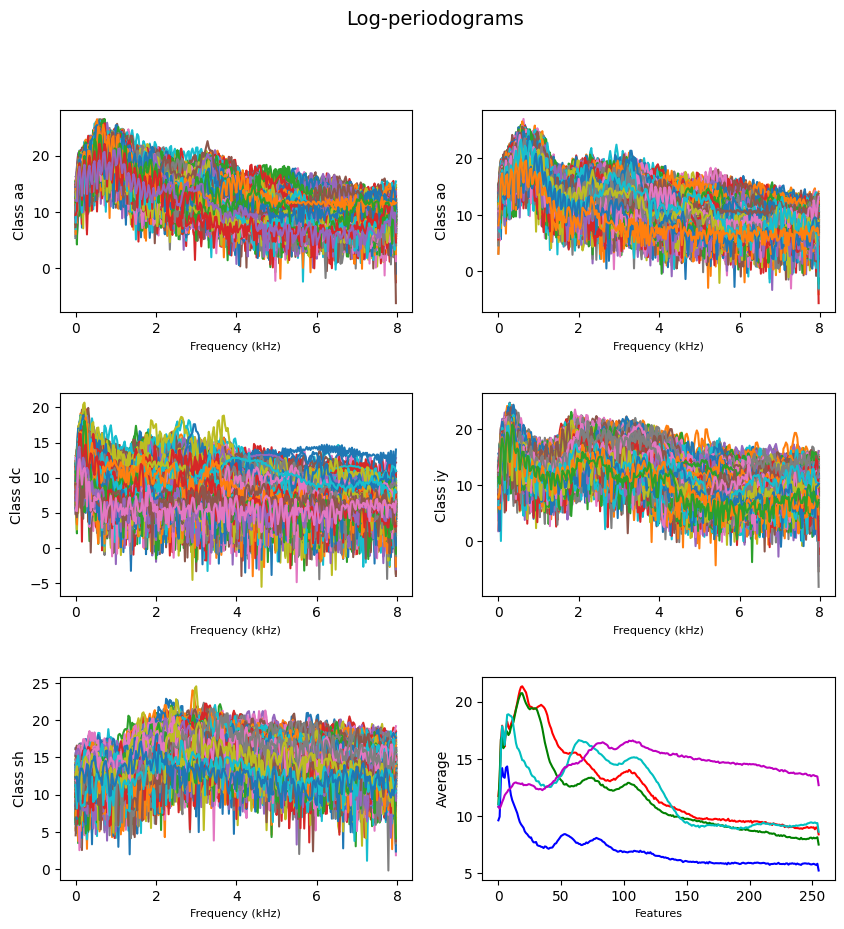

In [ ]:
# Select the features (first 256 columns) and the labels (last column)
X = np.array(df.iloc[:,0:256])
y = np.array(df.iloc[:,256])


# 5 different phoneme . and colors for each phoneme
classes = ['aa', 'ao', 'dc', 'iy', 'sh']
colors = ['r', 'g', 'b', 'c', 'm']

#the frequency axis
nfft = 256
fmax = 8 * nfft / 256
freqax = np.array(range(0, nfft)) * fmax / nfft


#3 rows, 2 columns to fit all phonemes
fig, ax = plt.subplots(figsize=(10,10), nrows= 3, ncols=2)
fig.suptitle('Log-periodograms', fontsize=14)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
xdm = np.zeros((5, nfft))

#Loop through each phoneme class and plot its spectrum
for idc, nc in enumerate(classes):
    index = y == (idc+1)
    xd = X[index, 0:nfft]
    xdm[idc, :] = xd.mean(axis=0)# Calculate the mean spectrum for this class
    plt.subplot(3, 2, idc+1)
    for ids in range(0, len(xd)):
        plt.plot(freqax, xd[ids, :])
        plt.xlabel('Frequency (kHz)', fontsize=8)
        plt.ylabel('Class ' + nc)

# Plot the average spectrum for all classes in the last subplot
plt.subplot(3, 2, 6)
for idc, nc in enumerate(classes):
    plt.plot(np.array(range(0, nfft)), xdm[idc, :], color=colors[idc])
    plt.xlabel('Features', fontsize=8)
    plt.ylabel('Average')

plt.show()


Q2. Include the error probabilities for the training and test sets obtained with the linear classifier (LC) and the quadratic classifier (QC), using all the features. Discuss the results.

In [ ]:
Xm = X.mean(axis=0)
X = X - Xm

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=5, shuffle=True, stratify=y)

#LC
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_train, y_train)
y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)
lda_train_error = 1 - accuracy_score(y_train, y_train_pred_lda)
lda_test_error = 1 - accuracy_score(y_test, y_test_pred_lda)
print(f'LDA train error: {lda_train_error:.4f}')
print(f'LDA test error: {lda_test_error:.4f}')

#QC
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)
y_train_pred_qda = qda.predict(X_train)
y_test_pred_qda = qda.predict(X_test)
qda_train_error = 1 - accuracy_score(y_train, y_train_pred_qda)
qda_test_error = 1 - accuracy_score(y_test, y_test_pred_qda)
print(f'QDA train error: {qda_train_error:.4f}')
print(f'QDA test error: {qda_test_error:.4f}')



LDA train error: 0.0624
LDA test error: 0.0732
QDA train error: 0.0003
QDA test error: 0.1707


Q3. Include the confusion matrices for the test set obtained with the linear classifier (LC) and the quadratic classifier (QC), using all the features. Discuss the results.


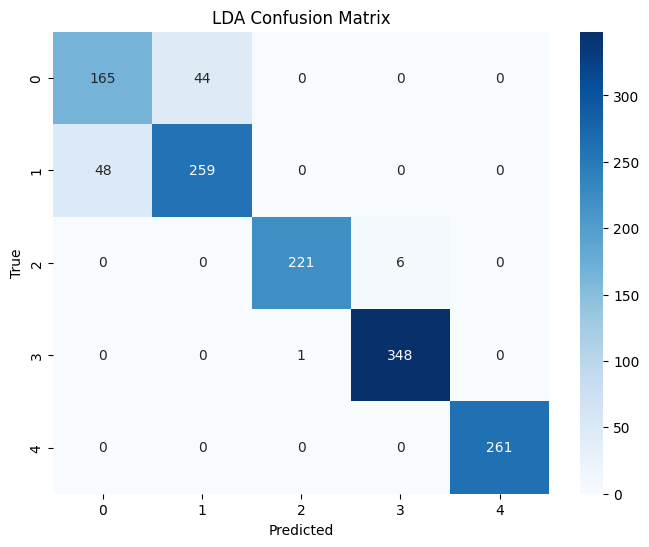

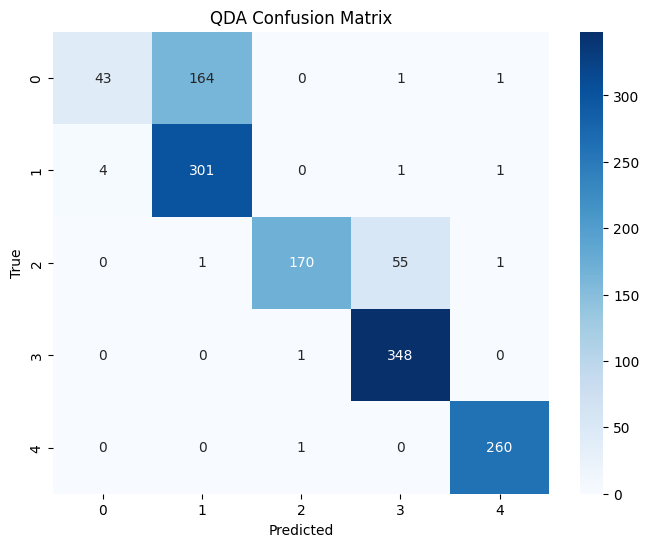

In [ ]:
#LC
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_train, y_train)
y_test_pred_lda = lda.predict(X_test)
lda_confusion_matrix = confusion_matrix(y_test, y_test_pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(lda_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#QC
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)
y_test_pred_qda = qda.predict(X_test)
qda_confusion_matrix = confusion_matrix(y_test, y_test_pred_qda)
plt.figure(figsize=(8, 6))
sns.heatmap(qda_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('QDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Q6. Show the error curves for the linear and the quadratic classifier on the training and on the test set.

In [ ]:
df.shape

(4508, 257)

In [ ]:
df.columns[-1]

'5'

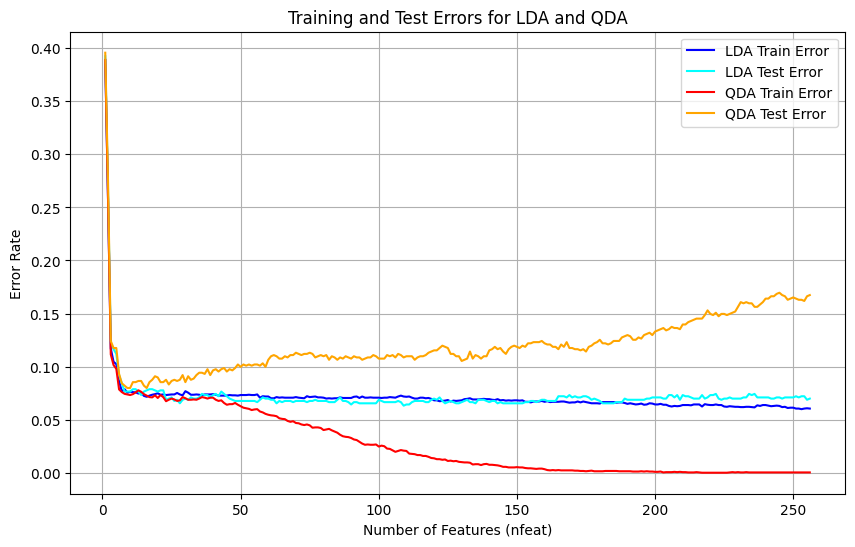

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming `df` is your dataset (256 features + label as the last column)
X = df.iloc[:, :-1].values  # 256-dimensional feature vectors
y = df.iloc[:, -1].values   # Labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store errors
lda_train_errors = []
lda_test_errors = []
qda_train_errors = []
qda_test_errors = []

# Loop over nfeat (number of principal components)
n_features = X_train.shape[1]  # 256 features

for nfeat in range(1, n_features + 1):
    # Perform PCA
    pca = PCA(n_components=nfeat)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Linear Discriminant Analysis (LDA)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_pca, y_train)
    y_train_pred_lda = lda.predict(X_train_pca)
    y_test_pred_lda = lda.predict(X_test_pca)

    # Calculate training and test errors for LDA
    lda_train_error = 1 - accuracy_score(y_train, y_train_pred_lda)
    lda_test_error = 1 - accuracy_score(y_test, y_test_pred_lda)

    # Store the errors
    lda_train_errors.append(lda_train_error)
    lda_test_errors.append(lda_test_error)

    # Quadratic Discriminant Analysis (QDA)
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_pca, y_train)
    y_train_pred_qda = qda.predict(X_train_pca)
    y_test_pred_qda = qda.predict(X_test_pca)

    # Calculate training and test errors for QDA
    qda_train_error = 1 - accuracy_score(y_train, y_train_pred_qda)
    qda_test_error = 1 - accuracy_score(y_test, y_test_pred_qda)

    # Store the errors
    qda_train_errors.append(qda_train_error)
    qda_test_errors.append(qda_test_error)

# Plot the error curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features + 1), lda_train_errors, label='LDA Train Error', color='blue')
plt.plot(range(1, n_features + 1), lda_test_errors, label='LDA Test Error', color='cyan')
plt.plot(range(1, n_features + 1), qda_train_errors, label='QDA Train Error', color='red')
plt.plot(range(1, n_features + 1), qda_test_errors, label='QDA Test Error', color='orange')

plt.xlabel('Number of Features (nfeat)')
plt.ylabel('Error Rate')
plt.title('Training and Test Errors for LDA and QDA')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate differences between test and train errors
lda_differences = np.abs(np.array(lda_test_errors) - np.array(lda_train_errors))
qda_differences = np.abs(np.array(qda_test_errors) - np.array(qda_train_errors))

# Find the indices where test errors are minimized
lda_min_test_error = np.min(lda_test_errors)
qda_min_test_error = np.min(qda_test_errors)

# Indices with the minimum test errors
lda_min_indices = np.where(lda_test_errors == lda_min_test_error)[0]
qda_min_indices = np.where(qda_test_errors == qda_min_test_error)[0]

# Find the best index where the difference between test and train error is minimized
lda_sweetspot = lda_min_indices[np.argmin(lda_differences[lda_min_indices])] + 1
qda_sweetspot = qda_min_indices[np.argmin(qda_differences[qda_min_indices])] + 1

print("LDA sweet spot for number of features:", lda_sweetspot)
print("QDA sweet spot for number of features:", qda_sweetspot)


LDA sweet spot for number of features: 109
QDA sweet spot for number of features: 9


In [ ]:
print(qda_train_errors[8], qda_test_errors[8])

0.07376594564614536 0.07982261640798227


In [ ]:
print(lda_train_errors[108], lda_test_errors[108])

0.07182473655019417 0.06319290465631933
